In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer,ColumnTransformer

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.pipeline import Pipeline, make_pipeline

In [13]:
file_path = '/Users/xwyang/Desktop/data/housing.csv'

In [14]:
housing = pd.read_csv(file_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
num_pipe =make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))

In [32]:
processing = make_column_transformer((num_pipe,make_column_selector(dtype_include='number')),
                                        (cat_pipe,make_column_selector(dtype_include='object')))

In [34]:
final_pipeline =Pipeline([('process',processing),('random_forest',RandomForestRegressor(random_state=42))])

In [35]:
list(range(2,20))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [36]:
param = {'random_forest__max_features':list(range(2,20)),'random_forest__n_estimators':[100,200,300,400]}

In [37]:
random_search = RandomizedSearchCV(final_pipeline,param,n_iter=10,cv=3,random_state=42,
                                  scoring='neg_root_mean_squared_error',n_jobs=-1)

In [38]:
num_housing = housing.select_dtypes(include='number')

In [48]:
X = housing.drop('median_house_value',axis=1)

y = housing['median_house_value']

In [49]:
X.shape,y.shape

((20640, 9), (20640,))

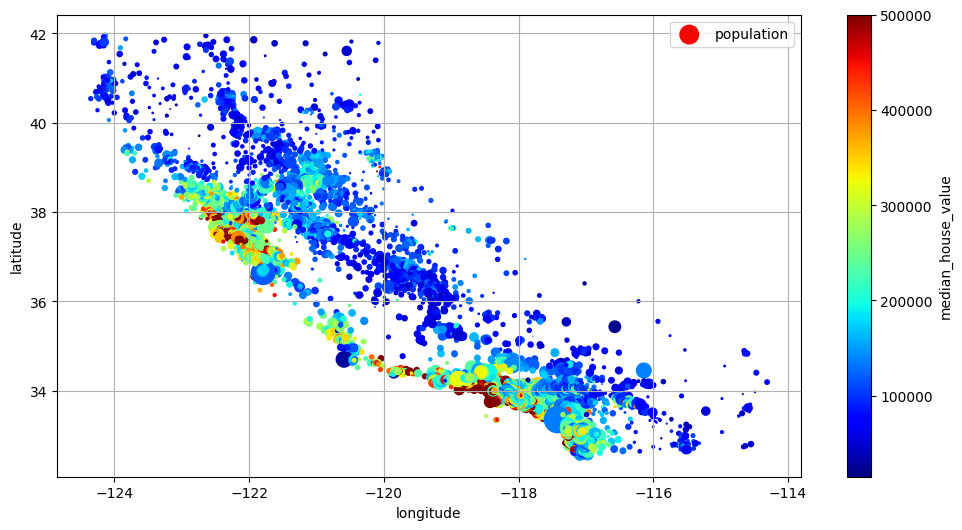

In [50]:
housing.plot(kind='scatter',x='longitude',y='latitude',s=housing['population']/100,c='median_house_value',
             cmap='jet',colorbar=True,legend=True, grid=True,label='population',sharex=False,figsize=(12,6))
plt.show()

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('process',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fc9f8b194e0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImp...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fc9f8b19de0>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'random_forest__max_features': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16, 17,
                                                                        18,
                                                                        19],
                                        'random_forest__n_estimators': [100,
                                                                        200,
                                                                        300,
                                                                        400]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [54]:
random_search.best_params_

{'random_forest__n_estimators': 300, 'random_forest__max_features': 6}

In [55]:
y_pred = random_search.predict(X_test)

In [56]:
mean_squared_error(y_pred,y_test,squared=False)

48703.08905801686

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
forest_rmse = cross_val_score(final_pipeline,X,y,cv=10,scoring='neg_root_mean_squared_error')
# when using cross_val_score, we need pass the entire data set X(features),y(target)

In [60]:
pd.Series(-forest_rmse).describe()

count        10.000000
mean      68403.675446
std       17946.322664
min       48928.975988
25%       56563.816779
50%       64496.921104
75%       78341.687099
max      106287.251411
dtype: float64

In [61]:
import joblib

In [63]:
best_model = random_search.best_estimator_

In [64]:
joblib.dump(best_model,'trained_best_forest.pkl.gz',compress='gzip')

['trained_best_forest.pkl.gz']

In [65]:
trained_model = joblib.load('trained_best_forest.pkl.gz')

In [70]:
(trained_model.predict(X_test)==y_pred).all()

True

In Python, you can compare two arrays to check if they are the same using various methods, depending on the type of arrays you're working with. Here are the most common approaches:

---

### **1. Using `==` and `.all()` for NumPy Arrays**
If you're working with **NumPy arrays**, you can use the `==` operator to perform an element-wise comparison and then use `.all()` to check if all elements are equal.

```python
import numpy as np

array1 = np.array([1, 2, 3])
array2 = np.array([1, 2, 3])

# Check if all elements are equal
if (array1 == array2).all():
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

---

### **2. Using `np.array_equal()` for NumPy Arrays**
NumPy provides a built-in function `np.array_equal()` to directly check if two arrays are equal.

```python
import numpy as np

array1 = np.array([1, 2, 3])
array2 = np.array([1, 2, 3])

if np.array_equal(array1, array2):
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

---

### **3. Using `==` for Python Lists**
If you're working with **Python lists**, you can directly use the `==` operator to check if the lists are the same.

```python
list1 = [1, 2, 3]
list2 = [1, 2, 3]

if list1 == list2:
    print("The lists are the same.")
else:
    print("The lists are different.")
```

---

### **4. Using `np.allclose()` for NumPy Arrays with Floating-Point Precision**
If you're comparing arrays with floating-point numbers, you might want to account for small numerical differences due to precision errors. In this case, use `np.allclose()`.

```python
import numpy as np

array1 = np.array([1.0, 2.0, 3.0])
array2 = np.array([1.0000001, 2.0000001, 3.0000001])

if np.allclose(array1, array2):
    print("The arrays are approximately the same.")
else:
    print("The arrays are different.")
```

---

### **5. Using `set()` for Unordered Comparisons**
If the order of elements doesn't matter and you want to check if two arrays (or lists) contain the same elements, you can convert them to sets and compare.

```python
list1 = [1, 2, 3]
list2 = [3, 2, 1]

if set(list1) == set(list2):
    print("The lists contain the same elements.")
else:
    print("The lists are different.")
```

---

### **Summary of Methods:**
| Array Type          | Method                          | Use Case                                      |
|---------------------|---------------------------------|-----------------------------------------------|
| NumPy arrays        | `(array1 == array2).all()`      | Exact element-wise comparison                 |
| NumPy arrays        | `np.array_equal(array1, array2)`| Exact comparison (cleaner syntax)             |
| NumPy arrays        | `np.allclose(array1, array2)`   | Approximate comparison for floating-point     |
| Python lists        | `list1 == list2`                | Exact comparison for lists                   |
| Any iterable        | `set(list1) == set(list2)`      | Unordered comparison (ignores duplicates)     |

---

### **Example Workflow:**
```python
import numpy as np

# Example arrays
array1 = np.array([1, 2, 3])
array2 = np.array([1, 2, 3])

# Check if arrays are the same
if np.array_equal(array1, array2):
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

Choose the method that best fits your use case!

 Here are some additional details and edge cases to consider when comparing arrays in Python:

---

### **1. Comparing Arrays of Different Shapes**
If the arrays have different shapes, they cannot be the same. You can check the shape of the arrays before comparing their elements.

```python
import numpy as np

array1 = np.array([1, 2, 3])
array2 = np.array([[1, 2, 3]])

if array1.shape == array2.shape:
    if np.array_equal(array1, array2):
        print("The arrays are the same.")
    else:
        print("The arrays are different.")
else:
    print("The arrays have different shapes and cannot be the same.")
```

---

### **2. Comparing Arrays with Different Data Types**
If the arrays have different data types, they might still be considered equal if their values are the same. However, you should be cautious when comparing arrays with mixed types.

```python
import numpy as np

array1 = np.array([1, 2, 3], dtype=int)
array2 = np.array([1.0, 2.0, 3.0], dtype=float)

if np.array_equal(array1, array2):
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

---

### **3. Comparing Arrays with NaN Values**
NaN (Not a Number) values are not considered equal to each other, even if both arrays contain NaN in the same positions. Use `np.isnan()` to handle NaN values explicitly.

```python
import numpy as np

array1 = np.array([1.0, np.nan, 3.0])
array2 = np.array([1.0, np.nan, 3.0])

# Check if non-NaN elements are equal and NaNs are in the same positions
if np.array_equal(array1[~np.isnan(array1)], array2[~np.isnan(array2)]) and \
   np.isnan(array1).all() == np.isnan(array2).all():
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

---

### **4. Comparing Arrays with Different Orders (C vs. F Contiguous)**
If the arrays have the same elements but different memory layouts (e.g., one is row-major and the other is column-major), they are still considered equal as long as their elements are the same.

```python
import numpy as np

array1 = np.array([[1, 2], [3, 4]], order='C')  # Row-major
array2 = np.array([[1, 2], [3, 4]], order='F')  # Column-major

if np.array_equal(array1, array2):
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

---

### **5. Comparing Arrays with Different Dimensionality**
If the arrays have different dimensionality (e.g., 1D vs. 2D), they cannot be the same. You can check the dimensionality using `.ndim`.

```python
import numpy as np

array1 = np.array([1, 2, 3])
array2 = np.array([[1, 2, 3]])

if array1.ndim == array2.ndim:
    if np.array_equal(array1, array2):
        print("The arrays are the same.")
    else:
        print("The arrays are different.")
else:
    print("The arrays have different dimensionality and cannot be the same.")
```

---

### **6. Comparing Arrays with Tolerance for Floating-Point Precision**
For floating-point arrays, small numerical differences might exist due to precision errors. Use `np.allclose()` with a tolerance to handle such cases.

```python
import numpy as np

array1 = np.array([1.0, 2.0, 3.0])
array2 = np.array([1.000001, 2.000001, 3.000001])

# Compare with a tolerance of 1e-5
if np.allclose(array1, array2, atol=1e-5):
    print("The arrays are approximately the same.")
else:
    print("The arrays are different.")
```

---

### **7. Comparing Arrays with Different Sizes**
If the arrays have different sizes, they cannot be the same. You can check the size using `.size`.

```python
import numpy as np

array1 = np.array([1, 2, 3])
array2 = np.array([1, 2, 3, 4])

if array1.size == array2.size:
    if np.array_equal(array1, array2):
        print("The arrays are the same.")
    else:
        print("The arrays are different.")
else:
    print("The arrays have different sizes and cannot be the same.")
```

---

### **8. Comparing Arrays with Different Strides**
If the arrays have the same elements but different strides (e.g., due to slicing), they are still considered equal as long as their elements are the same.

```python
import numpy as np

array1 = np.array([1, 2, 3, 4])
array2 = array1[::2]  # Sliced array with stride 2

if np.array_equal(array1, array2):
    print("The arrays are the same.")
else:
    print("The arrays are different.")
```

---

### **Summary of Edge Cases:**
| Scenario                        | Method                          | Notes                                        |
|---------------------------------|---------------------------------|----------------------------------------------|
| Different shapes                | Check `.shape`                  | Arrays with different shapes cannot be equal |
| Different data types            | `np.array_equal()`              | Values must match, but types can differ      |
| NaN values                     | `np.isnan()`                    | Handle NaN explicitly                        |
| Different memory layouts       | `np.array_equal()`              | Layout doesn't affect equality               |
| Different dimensionality       | Check `.ndim`                   | Arrays with different `.ndim` cannot be equal|
| Floating-point precision       | `np.allclose()`                 | Use tolerance for approximate equality      |
| Different sizes                | Check `.size`                   | Arrays with different sizes cannot be equal  |
| Different strides              | `np.array_equal()`              | Strides don't affect equality                |

---

### **Final Example: Comprehensive Comparison**
```python
import numpy as np

def compare_arrays(array1, array2):
    if array1.shape != array2.shape:
        return "The arrays have different shapes."
    if array1.dtype != array2.dtype:
        return "The arrays have different data types."
    if not np.array_equal(array1, array2):
        return "The arrays are different."
    return "The arrays are the same."

# Example usage
array1 = np.array([1, 2, 3])
array2 = np.array([1, 2, 3])
print(compare_arrays(array1, array2))
```

This function provides a comprehensive way to compare arrays while handling edge cases.